<a href="https://colab.research.google.com/github/eemaansheikh/Data_Science_2025/blob/main/EemaanSheikh__Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

In [ ]:
!pip install bambi

In [2]:

import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import graphviz as gv
import matplotlib.pyplot as plt
import seaborn as sns


**Task1**:

Does elpd_loo mean anything if we only have one model?

No because elpd_loo compares the effectiveness of two models to each other.

**Task2**:

Describe overfitting, in the context of this course

Overfitting means the model fits too closely to the curve, not allowing for outliers or variation in the data. without accounting for these, the model actually becomes less accurate in terms of representing reality.

**Task3**:

How do we mitigate overfitting?

* Regularizing priors that generalize the curve
* models with less variables

**Task4**:

How do we mitigate underfitting?
* Adapting more complex models

**Task5**:

Why would we want more than one predictor in a model?

Having more than one predictor accounts for more of the data, making the model less at risk of underfitting and improves the final prediction

**Task6**:

Can we have too many predictors? How would we know?

Yes, too many predictors can over-complexify the model and add risk of overfitting. the indicator of this is a decreased elpd value and.

**Task7**:

What is variable selection, and how does it work?

Variable selection means considering if we need multiple predictors, how many are needed, and which predictors to use. Using a casual model and a reference diagram with lots of variables, then begin removing variables and continue doing so as long as possible without compromising fit.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

Similarities:
- use a regression model where independent variables predict another variable

Differences:
- first model -- non-categorical and continuous predictor assumed to be same



**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

Yes we can visualize multiple linear regression models, but only if there's a singular predictor for all of them.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [8]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv'
    ).dropna()

In [11]:
import bambi as bmb


In [9]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [ ]:
#define the model
model_basketball = bmb.Model("`FGp` ~ `FTp` + Pos", data=bb)
#fit the model
idata_basketball = model_basketball.fit(idata_kwargs={'log_likelihood': True})

In [ ]:
#define the model, but as a hierarchy
model_basketball_h = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb)
#create the model
idata_basketball_h = model_basketball_h.fit(idata_kwargs={'log_likelihood': True})


In [ ]:
#define the model; bb_inter stands for baskeball interaction
model_bb_inter = bmb.Model("`FGp` ~ `FTp` + Pos + `FTp`:Pos", data=bb)
#create the model
idata_bb_inter = model_bb_inter.fit(idata_kwargs={'log_likelihood': True})

In [ ]:

#define the model; bb_interq stands for baskeball interaction quantiative
model_bb_interq = bmb.Model("`FGp` ~ `FTp` + `3PA` + `FTp`:`3PA`", data=bb)
#create the model
idata_bb_interq = model_bb_interq.fit(idata_kwargs={'log_likelihood': True})

In [ ]:
ft_pos_3pt_inter2 = bmb.Model("`FGp` ~ `FTp` + Pos + `3PA` + Pos:`3PA`", data=bb).fit(idata_kwargs={"log_likelihood":True})

In [26]:
cmp_df = az.compare({
    "FTp_Pos": idata_basketball,
    "FTp_Pos_hierarchy": idata_basketball_h,
    "FTp_Pos_interaction": idata_bb_inter,
    "FTp_3PA_interaction_no_Pos": idata_bb_interq,
    "FTp_Pos_3PA_Pos_3PA_interaction": ft_pos_3pt_inter2
})

#gemini helped with this

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

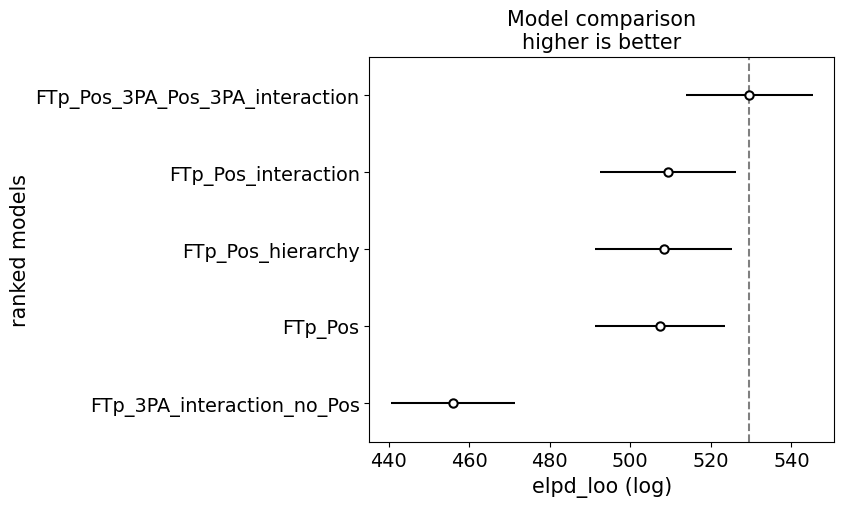

In [27]:
az.plot_compare(cmp_df)

**Task11**:

Which model is "better" according to this metric?

Model 5 is the best metric.

Why do you think that is?

Higher elpd_loo value = more accurate.

**Task12:**

The body data set has a measure of body fat percentage (siri), as well as several other measurments of other parts of a person's body, plus their age.

Create a sensible causal diagram for this set of variables.

Based on your causal diagram, which variable should you try to predict? Why?

In [28]:
body = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/body_fat.csv')

In [29]:
body.head()

,siri,age,weight,height,abdomen,thigh,wrist
0,12.3,23,70.1,172,85.2,59.0,17.1
1,6.1,22,78.8,184,83.0,58.7,18.2
2,25.3,22,70.0,168,87.9,59.6,16.6
3,10.4,26,84.0,184,86.4,60.1,18.2
4,28.7,24,83.8,181,100.0,63.2,17.7


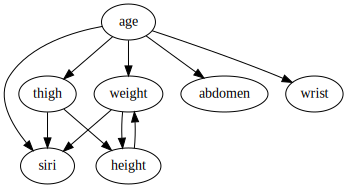

In [37]:
b_dag = gv.Digraph(name="Bikes DAG")

b_dag.node('S','siri')
b_dag.node('A','age')
b_dag.node('W','weight')
b_dag.node('H','height')
b_dag.node('D','abdomen')
b_dag.node('T','thigh')
b_dag.node('R','wrist')

b_dag.edges(['AS','AW','WS','AD','AT','TS','TH','AR','HW','WH'])

b_dag

Should try to predict siri -- the most amount of predictors (arrows)